In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime as dt
import seaborn as sns

In [404]:


xls =r'C:\Users\yfird\OneDrive\Desktop\KPMG VIRTUAL INTERNSHIP\KPMG_VI_New_raw_data_update_final.xlsx'
data=pd.read_excel(xls,sheet_name='Transactions')
df1=pd.read_excel(xls,sheet_name='NewCustomerList')
df2=pd.read_excel(xls,sheet_name='CustomerDemographic')
df3=pd.read_excel(xls,sheet_name='CustomerAddress')

In [405]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
data.describe

<bound method NDFrame.describe of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1

In [407]:
data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [408]:
data.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
Unnamed: 13                 True
Unnamed: 14                 True
Unnamed: 15                 True
Unnamed: 16                 True
Unnamed: 17                 True
Unnamed: 18                 True
Unnamed: 19                 True
Unnamed: 20                 True
Unnamed: 21                 True
Unnamed: 22                 True
Unnamed: 23                 True
Unnamed: 24                 True
Unnamed: 25                 True
dtype: bool

In [409]:
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)
df=data
print(df.columns)


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')


In [410]:
df.isnull().any().sum()

7

In [411]:
#Data profiling
#number of missing data
#mean values
#mode values
#

In [412]:
df.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
dtype: bool

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [414]:
df.dropna()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [416]:
df.isnull().values.sum()

1542

In [417]:
df.dropna(axis=0,inplace=True)

In [418]:
df.duplicated().sum()

0

In [419]:
df.shape

(19445, 13)

In [420]:
df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [421]:
df['product_id'].astype(int)

0         2
1         3
2        37
3        88
4        78
         ..
19995    51
19996    41
19997    87
19998     6
19999    11
Name: product_id, Length: 19445, dtype: int32

In [422]:
df['brand'].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

check spelling error

In [423]:
df['online_order'].value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

In [424]:
df['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [425]:
df['product_class'].value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [426]:
df['product_size'].value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [427]:
df['product_line'].value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [428]:
[#check distribution 
#check outliers
#date transaction
]

[]

<AxesSubplot:>

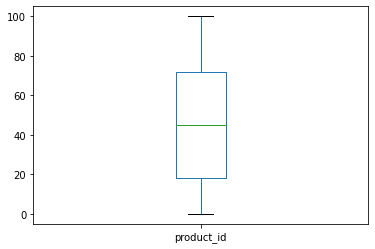

In [429]:
df['product_id'].plot(kind='box')

<AxesSubplot:>

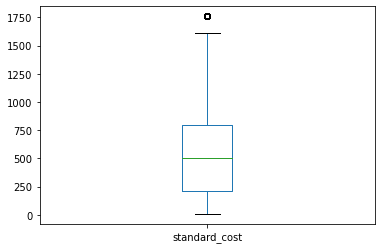

In [430]:
df['standard_cost'].plot(kind='box')

In [431]:
#print(np.where(df['standard_cost']>1600))

In [432]:
z=np.abs(stats.zscore(df['customer_id']))
threshold=3
zs=np.where(z>3)
zs

(array([ 8478, 16232, 16977], dtype=int64),)

In [433]:
#format first sold date
df['product_first_sold_date']=pd.TimedeltaIndex(df['product_first_sold_date'],unit='d') + dt.datetime(1900,1,1)
df['product_first_sold_date'].head()

0   2012-12-04
1   2014-03-05
2   1999-07-22
3   1998-12-18
4   2015-08-12
Name: product_first_sold_date, dtype: datetime64[ns]

In [434]:
df['product_first_sold_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2004-08-04 18:12:27.585497472
min                1991-01-23 00:00:00
25%                1997-08-27 00:00:00
50%                2004-08-19 00:00:00
75%                2011-05-11 00:00:00
max                2016-12-08 00:00:00
Name: product_first_sold_date, dtype: object

In [435]:
#categorical viz

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [437]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


In [438]:
df.to_csv('Transaction clean.csv')

In [439]:
df1.drop(df1.filter(regex="Unnamed"),axis=1, inplace=True)
df2.drop(df2.filter(regex="Unnamed"),axis=1, inplace=True)
df3.drop(df3.filter(regex="Unnamed"),axis=1, inplace=True)

CUSTOMER LIST 

In [440]:
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


<AxesSubplot:>

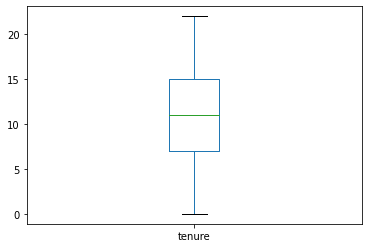

In [441]:
df1['tenure'].plot(kind='box')

<AxesSubplot:>

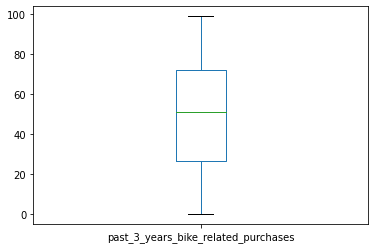

In [442]:
df1['past_3_years_bike_related_purchases'].plot(kind='box')

In [443]:
df1.isnull().any()

first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                 False
address                                False
postcode                               False
state                                  False
country                                False
property_valuation                     False
Rank                                   False
Value                                  False
dtype: bool

In [444]:
df1['job_title'].dropna(axis=0,inplace=True)
df1['last_name'].dropna(axis=0,inplace=True)
df1['job_industry_category'].dropna(axis=0,inplace=True)

In [445]:
df1['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [446]:
df1['DOB'].fillna(df1['DOB'].mean())

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 1000, dtype: datetime64[ns]

In [447]:
df1['DOB'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: DOB, Length: 1000, dtype: bool

In [448]:
df1['gender'].replace('U','Unknown',inplace=True)
df1['deceased_indicator'].replace('N','NO',inplace=True)


In [449]:
df1.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [450]:
df1.astype({'first_name':'str','last_name':"str",'gender':'str','deceased_indicator':'str','job_title':'str','job_industry_category':'str',
'wealth_segment':'str','owns_car':'str','state':'str','country':'str'
})

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,NO,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,NO,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,NO,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,NO,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,NO,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,NO,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,NO,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,NO,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,NO,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [451]:
df1['deceased_indicator'].value_counts()

NO    1000
Name: deceased_indicator, dtype: int64

In [452]:
df1['country'].value_counts()

Australia    1000
Name: country, dtype: int64

In [453]:
df1['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [454]:
df1['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [455]:
df1['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [456]:
df1.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [457]:
df1.shape

(1000, 18)

In [458]:
df1.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [459]:
def dob_age (born):
    today=dt.date.today()
    return today.year-born.year -((today.month,today.day,)< (born.month,born.day))

In [460]:
from datetime import date
df1['age']=pd.to_datetime(df1['DOB'])
df1['age']=df1['age'].apply(lambda x: dob_age(x))
df1['age']=df1['age'].convert_dtypes()
df1['age'].head()

0    64
1    52
2    47
3    43
4    56
Name: age, dtype: Int64

In [461]:
df1.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,NO,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374,62
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,NO,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357,20
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,NO,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357,67
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,NO,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357,69
999,Sylas,Duffill,Male,56,1955-10-02,Staff Accountant IV,Property,Mass Customer,NO,Yes,14,21875 Grover Drive,2010,NSW,Australia,9,1000,0.340,66


In [462]:
df1.loc[df1['last_name']=='NaN','last_name']='Not known'

In [463]:
df1[df1['job_industry_category'].isna()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,NO,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,24
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,NO,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,44
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,NO,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,40
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,NO,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,54
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,NO,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,NO,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,55
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,NO,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,23
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,NO,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,53
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,NO,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,29


In [464]:
print(df1['job_industry_category'].unique())

['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']


In [465]:
df1.loc[df1['job_title']=='Quality Control Specialist','job_industry_category']='Manufacturing'

In [466]:
df1.loc[df1['job_title']=='VP Quality Control']

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
47,Jobina,Gobourn,Female,85,1994-12-04,VP Quality Control,NaN,High Net Worth,NO,Yes,14,18 Grim Road,4305,QLD,Australia,4,46,1.407812,27
172,Feodor,Vickers,Male,60,1989-11-18,VP Quality Control,Financial Services,Mass Customer,NO,Yes,4,40809 Truax Way,2209,NSW,Australia,6,173,1.171875,32
240,Farra,Matyushkin,Female,18,1974-01-24,VP Quality Control,Manufacturing,High Net Worth,NO,Yes,9,52761 Portage Crossing,3170,VIC,Australia,9,241,1.087500,48
478,Aloysius,Killingsworth,Male,89,1957-02-14,VP Quality Control,NaN,Mass Customer,NO,No,12,625 Mandrake Junction,2145,NSW,Australia,9,478,0.880000,65
677,Wylie,Huntingdon,Male,99,1966-08-11,VP Quality Control,Financial Services,Mass Customer,NO,No,15,08822 Duke Road,2763,NSW,Australia,8,676,0.701250,55
680,Myrtie,Ostrich,Female,70,1996-06-18,VP Quality Control,Property,Affluent Customer,NO,Yes,9,320 Acker Drive,2251,NSW,Australia,7,676,0.701250,25
694,Arman,Yakubov,Male,68,1977-10-07,VP Quality Control,Property,High Net Worth,NO,Yes,17,11121 Jackson Crossing,2323,NSW,Australia,4,691,0.690625,44
710,Bertine,Smalles,Female,85,1983-12-10,VP Quality Control,Financial Services,Mass Customer,NO,Yes,9,7 Johnson Hill,3028,VIC,Australia,8,708,0.680000,38
849,Leeland,NaN,Male,66,1957-01-24,VP Quality Control,Telecommunications,High Net Worth,NO,No,12,9 Stephen Center,4122,QLD,Australia,4,845,0.563125,65
856,Hayes,Daveren,Male,32,1953-03-27,VP Quality Control,Manufacturing,Affluent Customer,NO,Yes,11,1 Becker Parkway,4350,QLD,Australia,2,856,0.560000,68


In [467]:
#if jobtitle of missing vlaue= job tile of another, replace with mode job_industry category


In [468]:
df1['age'].mean()
df1.loc[df1['DOB']=='NaN','DOB']='1970-01-01'

In [469]:
df1.dropna()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12 00:00:00,General Manager,Manufacturing,Mass Customer,NO,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,64
1,Morly,Genery,Male,69,1970-03-22 00:00:00,Structural Engineer,Property,Mass Customer,NO,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,52
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,NO,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47
3,Lucine,Stutt,Female,64,1979-01-28 00:00:00,Account Representative III,Manufacturing,Affluent Customer,NO,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43
4,Melinda,Hadlee,Female,34,1965-09-21 00:00:00,Financial Analyst,Financial Services,Affluent Customer,NO,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07 00:00:00,Paralegal,Financial Services,Affluent Customer,NO,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,62
996,Burk,Wortley,Male,22,2001-10-17 00:00:00,Senior Sales Associate,Health,Mass Customer,NO,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,20
997,Melloney,Temby,Female,17,1954-10-05 00:00:00,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,NO,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,67
998,Dickie,Cubbini,Male,30,1952-12-17 00:00:00,Financial Advisor,Financial Services,Mass Customer,NO,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,69


In [470]:
df1.duplicated().any()

False

In [471]:
df1.shape

(1000, 19)

In [472]:
df1.to_csv('customer_list.csv')

CUSTOMER DEMOGRAPHIC

In [473]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [474]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [475]:
df2.deceased_indicator.value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [476]:
df2=df2[df2['deceased_indicator'].str.contains('Y')==False]

In [477]:
df2.loc[df2['gender']=='U','gender']='Unknown'
df2.loc[df2['gender']=='M','gender']='Male'
df2.loc[df2['gender']=='F','gender']='Female'
df2.loc[df2['gender']=='Femal','gender']='Female'

In [478]:
df2['tenure']=df2['tenure'].convert_dtypes()

In [479]:
df2['tenure'].mean()

10.65865507542828

In [480]:
df2['tenure']=df2['tenure'].fillna(10)

In [481]:
df2['DOB']=df2['DOB'].fillna('1977-01-01 00:00:00')


In [482]:
def dob_age (born):
    today=dt.date.today()
    return today.year-born.year -((today.month,today.day,)< (born.month,born.day))
from datetime import date
df2['age']=pd.to_datetime(df2['DOB'])
df2['age']=df2['age'].apply(lambda x: dob_age(x))
df2['age']=df2['age'].convert_dtypes()
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,68
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,41
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,68
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,60
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,44


In [483]:
df2['first_name'].value_counts()

Timmie    5
Max       5
Tobe      5
Pail      4
Kippy     4
         ..
Ernie     1
Ronda     1
Kimbra    1
Domini    1
Haydon    1
Name: first_name, Length: 3139, dtype: int64

In [484]:
df2['age'].max()
df2['age'].min()

20

In [485]:
df2.dtypes

customer_id                             int64
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases     int64
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
default                                object
owns_car                               object
tenure                                  Int64
age                                     Int64
dtype: object

In [486]:
df2['age'].mean()

44.21485742871436

In [487]:
df2.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

In [488]:
df2['last_name']=df2['last_name'].fillna('Not Known')

In [489]:
df2['job_industry_category'].fillna('Not Stated',inplace=True)

In [490]:
df2['job_title'].fillna('Not Stated',inplace=True)

In [491]:
df2.loc[df2['age']=='NaN','age']=44

C:\Users\yfird\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

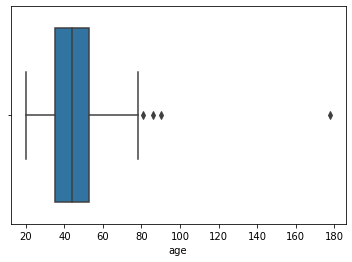

In [492]:
sns.boxplot(df2['age'])

In [493]:
df2.dropna(axis=0)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,68
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,41
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,68
3,4,Talbot,Not Known,Male,33,1961-10-03 00:00:00,Not Stated,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,60
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Not Stated,Affluent Customer,N,NIL,Yes,8,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,Rusty,Iapico,Male,93,1975-12-12 00:00:00,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14,46
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19,46
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1,20
3998,3999,Patrizius,Not Known,Male,11,1973-10-24 00:00:00,Not Stated,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10,48


In [494]:
del df2['default']

CUSTOMER DEMOGRAPHIC

In [495]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [496]:
df3['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [497]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [498]:
df3.loc[df3['state']=='New South Wales','state']='NSW'
df3.loc[df3['state']=='Victoria','state']='VIC'


MERGING CUSTOMER DEMOGRAPHIC AND ADDRESS TO MAKE CUSTOMER MASTER TABLE

In [499]:
customer=pd.merge(df2,df3,how='inner', on='customer_id')

In [500]:
customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,68,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,41,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,Not Known,Male,33,1961-10-03 00:00:00,Not Stated,IT,Mass Customer,N,No,7,60,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Not Stated,Affluent Customer,N,Yes,8,44,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,Not Stated,Retail,High Net Worth,N,Yes,13,55,9 Oakridge Court,3216,VIC,Australia,9


In [501]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 0 to 3993
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3994 non-null   int64 
 1   first_name                           3994 non-null   object
 2   last_name                            3994 non-null   object
 3   gender                               3994 non-null   object
 4   past_3_years_bike_related_purchases  3994 non-null   int64 
 5   DOB                                  3994 non-null   object
 6   job_title                            3994 non-null   object
 7   job_industry_category                3994 non-null   object
 8   wealth_segment                       3994 non-null   object
 9   deceased_indicator                   3994 non-null   object
 10  owns_car                             3994 non-null   object
 11  tenure                               3994 n

In [502]:
customer['last_name'].value_counts()

Not Known        125
Pristnor           3
Ramsdell           3
Van der Beken      2
Guilliatt          2
                ... 
Ghirigori          1
Newcom             1
Narbett            1
Blazewicz          1
Aimable            1
Name: last_name, Length: 3720, dtype: int64

In [503]:
customer['job_title'].fillna('Not Stated',inplace=True)


In [504]:
customer.isnull().any()

customer_id                            False
first_name                             False
last_name                              False
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                    False
job_title                              False
job_industry_category                  False
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                 False
age                                    False
address                                False
postcode                               False
state                                  False
country                                False
property_valuation                     False
dtype: bool

In [505]:
customer['job_industry_category'].fillna('Not Stated',inplace=True)

In [506]:
customer.shape

(3994, 18)

In [507]:
customer['age'].max()

178

In [508]:
customer.drop(customer[customer['age']>80].index,inplace=True)

In [509]:
customer.to_csv('customer.csv')